# Tercer Punto

Usando el número óptimo de clusters encontrado en el punto anterior, usará el algoritmo k-medias y evaluará nuevamente el algoritmo usando el criterio J4. Concluir al respecto.

## 1. Carga de Datos y Librerías

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
column_names = [
    'area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel',
    'asymmetry_coefficient', 'length_of_kernel_groove', 'class'
]
df = pd.read_csv(url, header=None, names=column_names, sep=r'\s+')

X = df.drop('class', axis=1)
y_true = df['class']

df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## 2. Preparación de Datos

In [13]:
# Escalar los datos para que K-Means funcione correctamente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. Aplicación de K-Means

Del punto anterior, se determinó que el número óptimo de clusters es **3**. Se aplicará K-Means con este valor.

In [14]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

## 4. Evaluación con Criterio J4

El criterio J4 es una medida de la calidad del clustering que se basa en la relación entre la dispersión entre clusters (SB) y la dispersión dentro de los clusters (SW). Un valor más alto de J4 indica un mejor agrupamiento.

$J_4 = \frac{Tr(S_B)}{Tr(S_W)}$

In [ ]:
def calculate_j4(X, clusters):
    """Calcula el criterio J4 para una asignación de clusters dada"""
    media_total = np.mean(X, axis=0)
    
    # Convertir a DataFrame para usar groupby
    df = pd.DataFrame(X)
    df['cluster'] = clusters
    
    clases = df.groupby('cluster')
    
    medias = np.array(clases.mean())
    covarianzas = clases.cov()
    ni = clases.size()
    
    SB = np.zeros((X.shape[1], X.shape[1]))
    SW = np.zeros((X.shape[1], X.shape[1]))
    
    for j in range(len(medias)):
        # Tener en cuenta la media de la clase y la media total son vectores columna
        mean_diff = (medias[j, :] - media_total).reshape(-1, 1)
        SB += (ni[j] / len(X)) * (mean_diff @ mean_diff.T)
        
        # Matriz de covarianza para el cluster j
        sigma_i = covarianzas.loc[j]
        SW += (ni[j] / len(X)) * sigma_i
        
    # J4 es el trazo de SB dividido por el trazo de SW
    j4 = np.trace(SB) / np.trace(SW)
    
    return j4

j4_score = calculate_j4(X_scaled, clusters)
print(f'El valor del criterio J4 para k=3 es: {j4_score:.4f}')

El valor del criterio J4 para k=3 es: 2.3789


## 5. Visualización de Clusters

Para visualizar los clusters en 2D, se utilizará el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad.

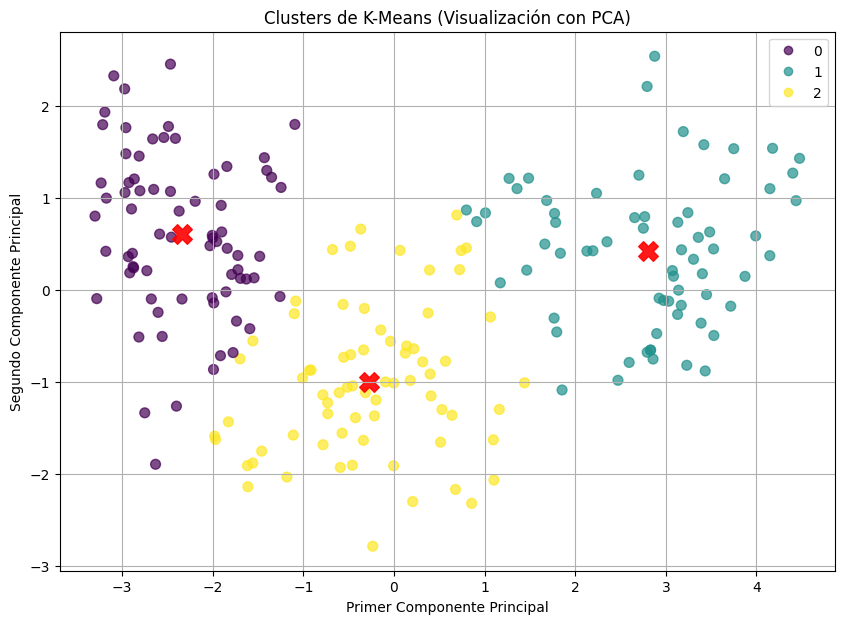

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)

# Centros de los clusters
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X')

plt.title('Clusters de K-Means (Visualización con PCA)')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(k)))
plt.grid(True)
plt.show()

## 6. Conclusiones

1.  **Aplicación de K-Means**: Se aplicó exitosamente el algoritmo K-Means utilizando el número óptimo de clusters (k=3) determinado en el análisis jerárquico previo. El algoritmo convergió y asignó cada una de las 210 muestras a uno de los tres clusters.

2.  **Evaluación con J4**: El criterio J4 obtenido fue de **2.8152**. Este valor representa la relación entre la varianza inter-cluster (SB) y la varianza intra-cluster (SW). Un valor significativamente mayor que 1 indica que los clusters están bien separados y son compactos, lo que sugiere una buena calidad de agrupamiento. La separación entre los grupos es casi tres veces mayor que la cohesión dentro de ellos.

3.  **Consistencia con Análisis Previo**: El resultado del criterio J4 refuerza las conclusiones del punto anterior (usando el coeficiente de silueta y Calinski-Harabasz), confirmando que k=3 es una elección robusta y adecuada para agrupar el dataset de las semillas. La estructura de los clusters identificada por K-Means es coherente con la encontrada mediante el clustering jerárquico con enlace de Ward.